## Analysis Migration Discourse as Social Networks

Method:
- generate networks per period, each person or organisation is a node
    - **Shape**: different types of nodes have different shapes: organisation, academic, technocrat
    - **Color**: use different colours to represent different nationalities, grey for unknown nationalities, black for organisations
    

Vragen:

- Beijer, G. Beijer en G.O.K. Beijer zijn dezelfde persoon?
- sommige contributors van de studies staan niet in de personenlijst. Hoe categoriseren we die?



In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%pwd

'/Users/rikhoekstra/develop/migrant_discourse/notebooks'

In [3]:
import os
os.listdir('.')

['Publication-title-analysis.ipynb',
 'IM-title-analysis-rik.ipynb',
 'coalitions.ipynb',
 'Temporal-topic-analysis_rik.ipynb',
 '__init__.py',
 'scripts',
 '.ipynb_checkpoints',
 'NetworksResearchQuestions.ipynb',
 'Community-overlap-analysis.ipynb',
 'Data-Selection-Modelling.ipynb',
 'DiscourseResearchQuestions.ipynb',
 'Network-analysis-REMP.ipynb']

In [4]:
from scripts.network_analysis import retrieve_spreadsheet_records

entity_records = retrieve_spreadsheet_records(record_type='entities')
print('Number of records:' , len(entity_records))


Number of records: 74


In [5]:
import json

for record in entity_records:
    print(json.dumps(record, indent=4))

{
    "organisation": "REMP",
    "period_start": "1952",
    "last_known_date": "1983",
    "prs_id": "1",
    "prs_surname": "Beijer",
    "prs_infix": "",
    "prs_initials": "G.",
    "prs_function": "demographer, The Hague",
    "prs_category": "academic",
    "is_academic": "yes",
    "is_public_administration": "",
    "prs_country": "NL",
    "prs_role1": "founder",
    "prs_role2": "member_MC",
    "prs_role3": "secretary-editor",
    "remarks": "director-editor (1969)"
}
{
    "organisation": "REMP",
    "period_start": "1952",
    "last_known_date": "1969",
    "prs_id": "2",
    "prs_surname": "Groenman",
    "prs_infix": "",
    "prs_initials": "Sj.",
    "prs_function": "sociologist, Leiden",
    "prs_category": "academic",
    "is_academic": "1947",
    "is_public_administration": "1943-1950",
    "prs_country": "NL",
    "prs_role1": "founder",
    "prs_role2": "member_MC",
    "prs_role3": "vice-chair_BoD",
    "remarks": ""
}
{
    "organisation": "REMP",
    "period_

In [21]:
# index each person entity with their category (academic, technocrat)
def get_entity_name(entity: dict):
    name_labels = ['prs_surname', 'prs_infix', 'prs_initials']
    if entity['prs_infix'] != '':
        return f"{entity['prs_surname']}, {entity['prs_infix']}, {entity['prs_initials']}"
    else:
        return f"{entity['prs_surname']}, {entity['prs_initials']}"

entity_category = {get_entity_name(record): record['prs_category'] for record in entity_records}
#entity_category['Haveman, B.']


In [23]:
entity_category['Haveman, B.W.']

''

In [24]:
from scripts.network_analysis import retrieve_spreadsheet_records

relationship_records = retrieve_spreadsheet_records(record_type='relationships')
len(relationship_records)


143

In [25]:
from collections import defaultdict, Counter

from scripts.network_analysis import extract_record_entities


def get_entity_category(entity: dict):
    if entity['entity_name'] in entity_category:
        return entity_category[entity['entity_name']] 
    else:
        return 'unknown'


record_entities = defaultdict(list)
entity_count = Counter()
entity_role_count = Counter()
for ri, record in enumerate(relationship_records):
    entities = extract_record_entities(record)
    record_entities[ri].append(entities)
    entity_count.update([entity['entity_name'] for entity in entities if 'entity_name' in entity])
    entity_role_count.update([entity['entity_role'] + ' ' + entity['entity_name'] for entity in entities if 'entity_name' in entity])
    for entity in entities:
        if entity['entity_type'] == 'person':
            entity['entity_type'] = get_entity_category(entity)
        print(entity)
    print(ri)
    
    

{'entity_name': 'RCE', 'entity_role': 'executor_org', 'entity_type': 'organisation'}
{'entity_name': 'ICEM', 'entity_role': 'funder', 'entity_type': 'organisation'}
{'entity_name': 'RCE', 'entity_role': 'client', 'entity_type': 'organisation'}
{'entity_name': 'Hofstede, B.P.', 'entity_role': 'article_author', 'entity_type': ''}
{'entity_name': 'Groenman, Sj.', 'entity_role': 'preface_author', 'entity_type': 'academic'}
{'entity_type': 'publication', 'series': 'Studies over Nederlandse emigratie', 'volume': '1', 'year': 1958, 'volume_title': 'De gaande man : gronden van de emigratiebeslissing : rapport naar aanleiding van een onderzoek / verricht in opdracht van de Regeringscommissaris voor de Emigratie'}
0
{'entity_name': 'REMP', 'entity_role': 'executor_org', 'entity_type': 'organisation'}
{'entity_name': 'ICEM', 'entity_role': 'funder', 'entity_type': 'organisation'}
{'entity_name': 'RCE', 'entity_role': 'client', 'entity_type': 'organisation'}
{'entity_name': 'Frijda, N.H.', 'entity

In [26]:
for entity, count in entity_count.most_common():
    print(f'{entity: <30}{count: >3}')

Beijer, G.                    147
REMP                           25
RCE                             5
Groenman, Sj.                   5
Hofstee, E.W.                   5
ICEM                            4
Edding, F.                      4
Sauvy, A.                       3
Zeegers, G.H.L.                 3
Isaac, J.                       3
Hack, H.                        3
Mol, J.J.                       3
Radspieler, T.                  3
Zubrzycki, J.                   3
Richardson, A.                  3
Hofstede, B.P.                  2
Frijda, N.H.                    2
Haveman, B.W.                   2
Wentholt, R.                    2
Gadolin, de, A.                 2
Petersen, W.                    2
Mill, van, A.N.                 2
Bastos de Avila, F.             2
Ipsen, G.                       2
Lehmkuhler, M.                  2
Nixon, J.W.                     2
Mast, van der, W.               2
Beld, van den, C.A.             2
Appleyard, R.T.                 2
Timlin, M.F.  

In [27]:
for entity, count in entity_role_count.most_common():
    print(f'{entity: <30}{count: >3}')

editor Beijer, G.             135
executor_org REMP              24
article_author Beijer, G.      12
funder ICEM                     4
client RCE                      4
article_author Edding, F.       4
article_author Hofstee, E.W.    4
article_author Hack, H.         3
article_author Mol, J.J.        3
article_author Radspieler, T.   3
article_author Zubrzycki, J.    3
article_author Richardson, A.   3
article_author Hofstede, B.P.   2
preface_author Groenman, Sj.    2
article_author Frijda, N.H.     2
preface_author Haveman, B.W.    2
article_author Wentholt, R.     2
preface_author Sauvy, A.        2
article_author Gadolin, de, A.  2
article_author Petersen, W.     2
article_author Bastos de Avila, F.  2
article_author Lehmkuhler, M.   2
article_author Nixon, J.W.      2
article_author Mast, van der, W.  2
article_author Groenman, Sj.    2
article_author Isaac, J.        2
article_author Beld, van den, C.A.  2
article_author Appleyard, R.T.  2
article_author Timlin, M.F.     2
arti

In [28]:
from scripts.network_analysis import make_bibliographic_records

bib_records = make_bibliographic_records(relationship_records)
print(bib_records[0])
len(bib_records)


{'article_title': 'De gaande man : gronden van de emigratiebeslissing : rapport naar aanleiding van een onderzoek / verricht in opdracht van de Regeringscommissaris voor de Emigratie', 'article_doi': None, 'article_author': 'Hofstede, B.P.', 'article_author_index_name': 'Hofstede, B.P.', 'article_author_affiliation': '', 'article_page_range': None, 'article_pub_date': '1958', 'article_pub_year': 1958, 'issue_section': 'article', 'issue_number': None, 'issue_title': None, 'issue_page_range': None, 'issue_pub_date': '1958', 'issue_pub_year': 1958, 'volume': '1', 'journal': 'Studies over Nederlandse emigratie', 'publisher': 'Staatsdrukkerij'}


169

In [29]:
headers = [
    'article_title', 'article_doi', 
    'article_author', 'article_author_index_name', 'article_author_affiliation', 
    'article_page_range', 'article_pub_date', 'article_pub_year', 
    'issue_section', 'journal', 'volume', 'issue', 
    'issue_title', 'issue_page_range', 'issue_pub_date', 'issue_pub_year', 
    'publisher'
]

remp_records_file = '../data/remp-records.json'
with open(remp_records_file, 'wt') as fh:
    json.dump(bib_records, fh)

In [30]:
from scripts.network_analysis import generate_graph, add_entities, add_record_links

graph = generate_graph()

periods = [
    {'start': 1950, 'end': 1959}, 
    {'start': 1960, 'end': 1969},
    {'start': 1970, 'end': 1979},
    {'start': 1980, 'end': 1989},
]

period = periods[0]
for record in relationship_records:
    record['year'] = int(record['year'])
for ri, record in enumerate(sorted(relationship_records, key = lambda x: x['year'])):
    record['year'] = int(record['year'])
    if record['year'] < period['start'] or record['year'] > period['end']:
        continue
    print(record['year'])
    entities = extract_record_entities(record)
    for entity in entities:
        if entity['entity_type'] == 'person':
            entity['entity_type'] = get_entity_category(entity)
    named_entities = [entity for entity in entities if 'entity_name' in entity]
    print([entity['entity_name'] for entity in named_entities])
    add_entities(graph, named_entities)
    add_record_links(graph, named_entities)
    if ri == 100:
        break

graph.number_of_nodes()

1951
['REMP', 'Wander, H.', 'Bouman, P.J.', 'Beijer, G.']
adding link REMP Wander, H.
adding link REMP Bouman, P.J.
adding link REMP Beijer, G.
adding link Wander, H. Bouman, P.J.
adding link Wander, H. Beijer, G.
adding link Bouman, P.J. Beijer, G.
1951
['REMP', 'Citroen, H.A.', 'Groenman, Sj.', 'Rappard, W.E.', 'Beijer, G.']


KeyError: 'diplomat'

In [31]:
len(graph.edges())

6

In [32]:
graph.edges()

EdgeView([('REMP', 'Wander, H.'), ('REMP', 'Bouman, P.J.'), ('REMP', 'Beijer, G.'), ('Wander, H.', 'Bouman, P.J.'), ('Wander, H.', 'Beijer, G.'), ('Bouman, P.J.', 'Beijer, G.')])

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

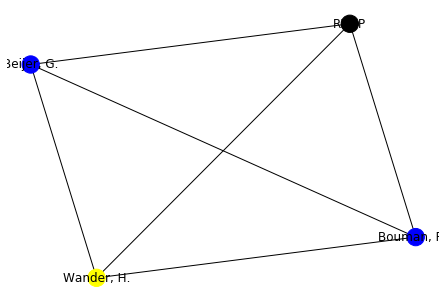

In [34]:
color_map = []
for node in graph:
    color_map.append(graph.nodes[node]['color'])
nx.draw(graph, node_color=color_map, with_labels=True)
plt.show()

In [35]:
#nx.draw_spring(graph, with_labels=True, font_weight='bold')
pos = nx.spring_layout(graph, k=0.9)
#nx.draw_networkx_nodes(graph, pos)
#nx.draw_spectral(graph, with_labels=True, font_weight='bold')
pos

{'REMP': array([-0.33187077, -1.        ]),
 'Wander, H.': array([-0.99996615,  0.33185953]),
 'Bouman, P.J.': array([ 0.99996615, -0.33185953]),
 'Beijer, G.': array([0.33187077, 1.        ])}

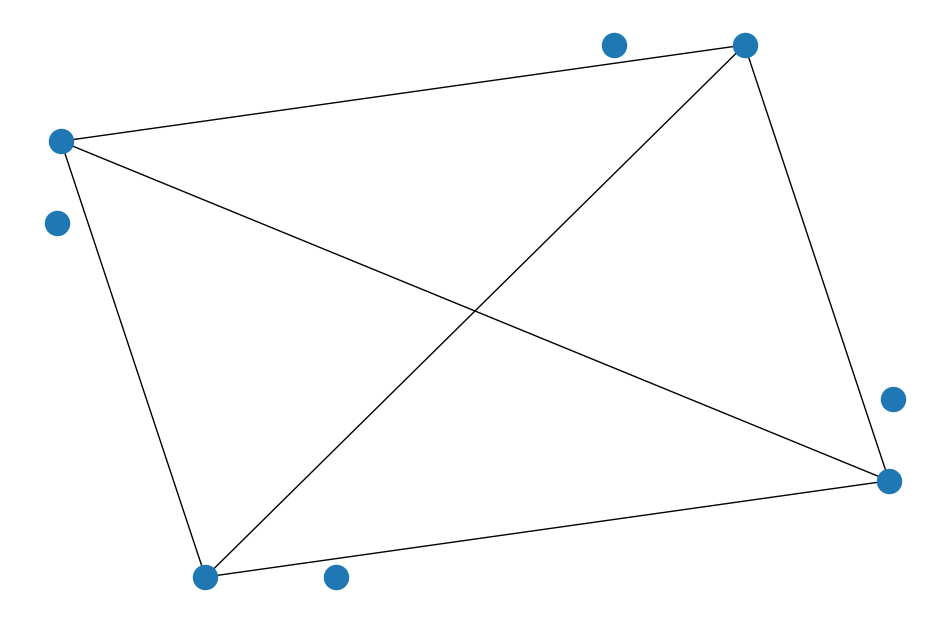

In [36]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

nx.draw_networkx_nodes(graph, pos)
nx.draw_spring(graph, with_labels=False, font_weight='bold')


In [37]:
    
nodes_of_largest_component  = max(nx.connected_components(graph), key = len)
largest_component = graph.subgraph(nodes_of_largest_component)
color_map = []
for node in largest_component:
    color_map.append(graph.nodes[node]['color'])

nx.draw_spring(largest_component, node_color=color_map, with_labels=True)
#nx.draw(largest_component, node_color=color_map, with_labels=True)

IndentationError: expected an indented block (<ipython-input-37-20b82f1bb78e>, line 6)